In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display, clear_output
import ipywidgets as widgets


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv") 

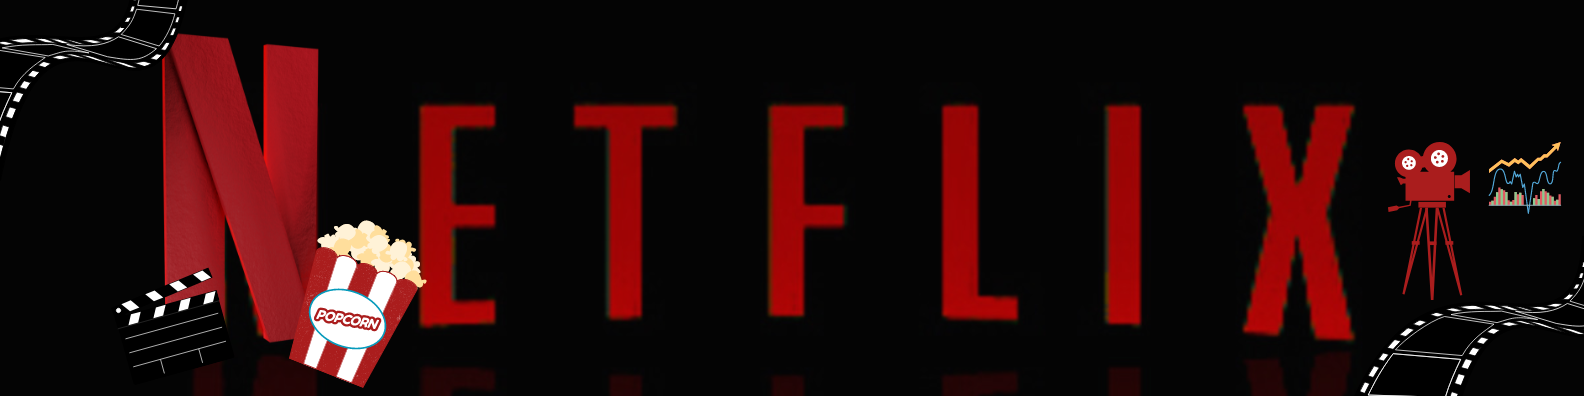

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data['director'].fillna('Unknown',inplace=True)
data['cast'].fillna('Unknown',inplace=True)
data['country'].fillna('Unknown',inplace=True)
data['date_added'].fillna('month,00,0000',inplace=True)
data['rating'].fillna('TV-MA', inplace=True)
data['duration'].fillna('season-1', inplace=True)

In [9]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
country_counts = data['country'].value_counts()
country_counts

United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [11]:
country_counts_df = pd.DataFrame({'Country': country_counts.index, 'MovieCount': country_counts.values})

In [12]:
country_counts_df

,Country,MovieCount
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
...,...,...
744,"Romania, Bulgaria, Hungary",1
745,"Uruguay, Guatemala",1
746,"France, Senegal, Belgium",1
747,"Mexico, United States, Spain, Colombia",1


In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the movie count data with the country map data
merged_data = world.merge(country_counts_df, left_on='name', right_on='Country')

# Create the folium map object
m = folium.Map(location=[0, 0], zoom_start=2)

# Choropleth map with hue based on movie counts
folium.Choropleth(
    geo_data=merged_data,
    data=merged_data,
    columns=['Country', 'MovieCount'],
    key_on='feature.properties.Country',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Movies Released',
    highlight=True,
).add_to(m)

# Add the movie count labels to the map
for _, row in merged_data.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(html=f"<div>{row['MovieCount']}</div>"),
    ).add_to(m)

# Display the interactive map
m



/tmp/ipykernel_20/2018199026.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the movie count data with the country map data
merged_data = world.merge(country_counts_df, left_on='name', right_on='Country')

# Group by continents and sum the movie counts
continent_counts = merged_data.groupby('continent')['MovieCount'].sum().reset_index()

# Merge the continent counts data with the continent map data
continent_data = world.merge(continent_counts, left_on='continent', right_on='continent')

# Create the folium map object
m = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=continent_data,
    data=continent_data,
    columns=['continent', 'MovieCount'],
    key_on='feature.properties.continent',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Movies Released',
    highlight=True,
).add_to(m)

m


/tmp/ipykernel_20/246366013.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


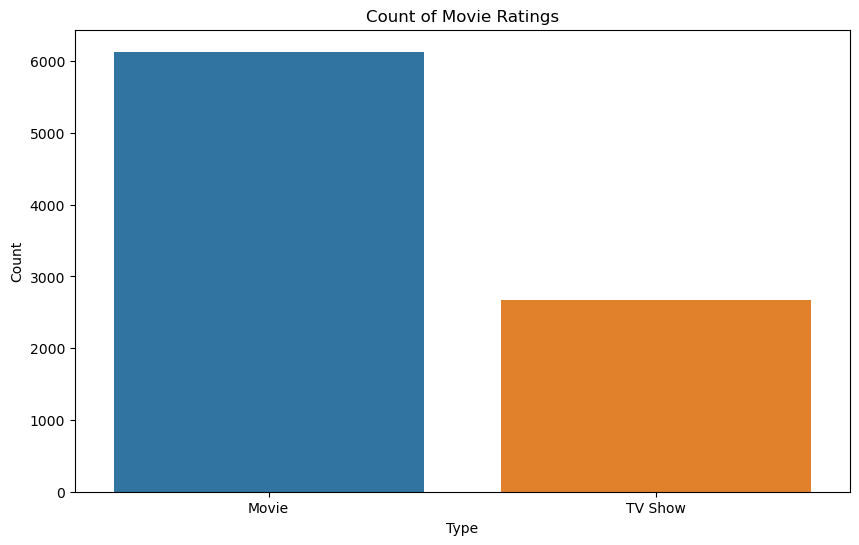

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movie Ratings')
plt.show()

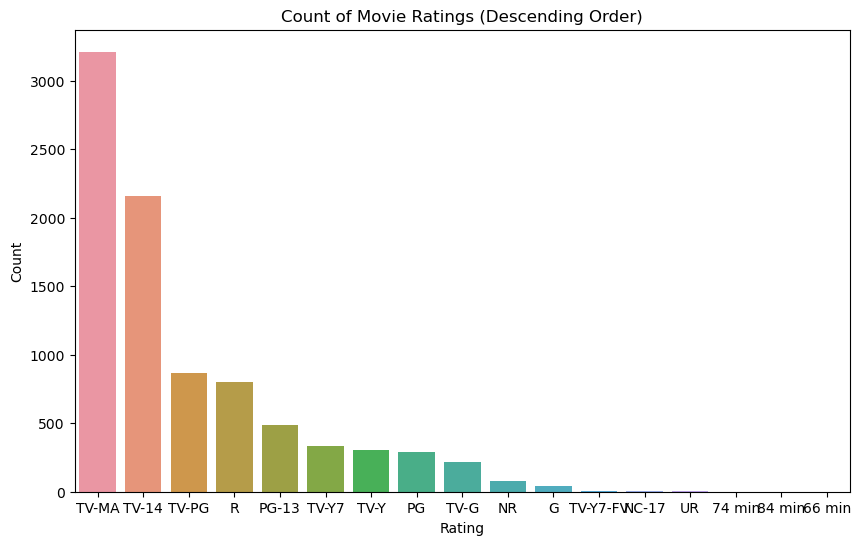

In [16]:
rating_order = data['rating'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', order=rating_order)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Movie Ratings (Descending Order)')
plt.show()

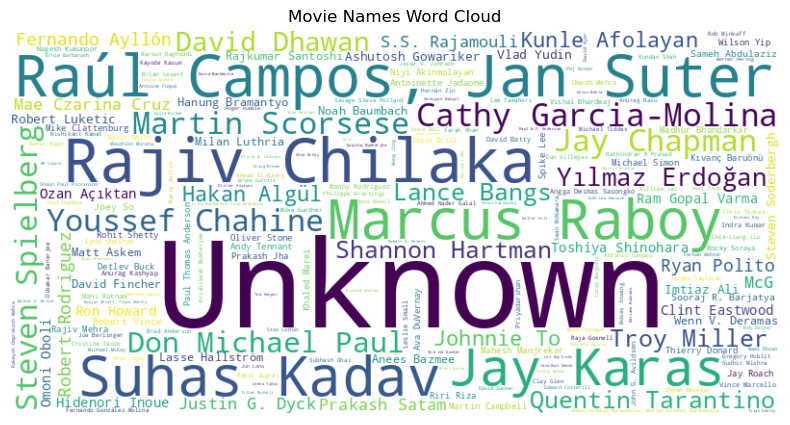

In [17]:
dr_count = data['director'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dr_count)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Names Word Cloud')
plt.show()

In [18]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


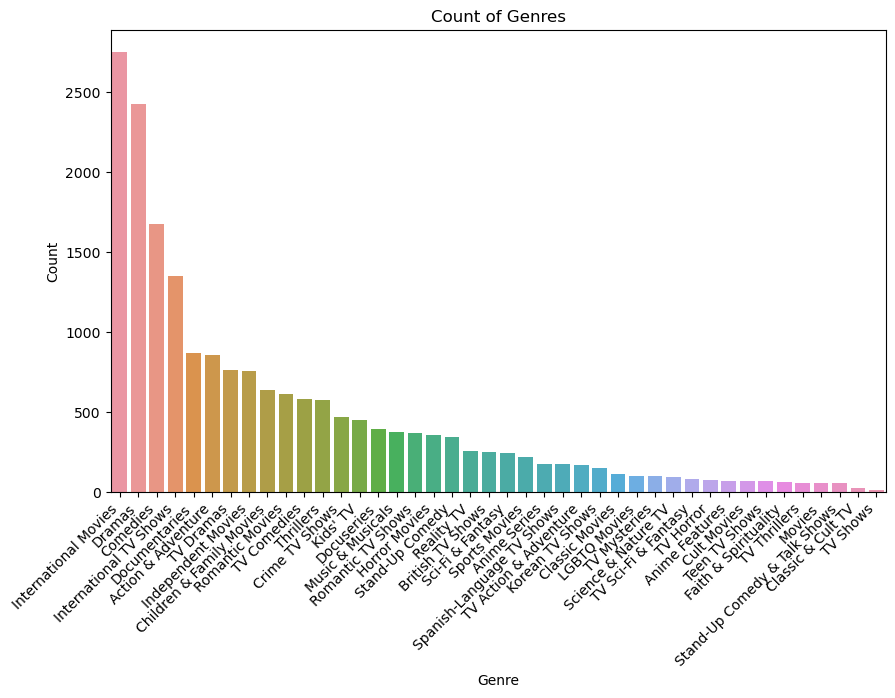

In [19]:
genre_counts = data['listed_in'].str.split(', ').explode().value_counts()

# Plot the count of genres using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
df = pd.DataFrame(data)

# Create interactive widgets for filtering
all_directors = ['All'] + df['director'].unique().tolist()
director_widget = widgets.Dropdown(options=all_directors, description='Director:')

all_countries = ['All'] + df['country'].unique().tolist()
country_widget = widgets.Dropdown(options=all_countries, description='Country:')

all_genres = ['All'] + df['listed_in'].str.split(', ').explode().unique().tolist()
genre_widget = widgets.Dropdown(options=all_genres, description='Genre:')

# Output widget to display the filtered movie list
output = widgets.Output()

# Function to filter and display movies based on user input
def filter_movies(director, country, genre):
    with output:
        clear_output(wait=True)
        if director == 'All':
            director_filter = df['director'].notna()  # All rows with non-null director
        else:
            director_filter = df['director'] == director
            
        if country == 'All':
            country_filter = df['country'].notna()  # All rows with non-null country
        else:
            country_filter = df['country'] == country
            
        if genre == 'All':
            genre_filter = df['listed_in'].notna()  # All rows with non-null genre
        else:
            genre_filter = df['listed_in'].str.contains(genre, na=False)
        
        filtered_df = df[director_filter & country_filter & genre_filter]
        display(filtered_df[['title', 'rating']])

# Function to handle widget changes
def on_change(change):
    filter_movies(director_widget.value, country_widget.value, genre_widget.value)

# Attach the change event to each widget
director_widget.observe(on_change, names='value')
country_widget.observe(on_change, names='value')
genre_widget.observe(on_change, names='value')

# Initial display of all movies
filter_movies(director_widget.value, country_widget.value, genre_widget.value)

# Display the interactive widgets and output
widgets.VBox([director_widget, country_widget, genre_widget, output])
